## Athlete events Data analysis

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('athlete_events_combined.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,CHN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,CHN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,DEN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,DEN,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,NED,Netherlands


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270767 non-null  object 
 16  Notes   270746 non-null  object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


#### Calculate (mean, median, mode) for numerical columns  Age, Height, and Weight.

In [37]:
print("Mean of Ages :", df['Age'].mean())
print("Mean of Height :", df['Height'].mean())
print("Mean of Weight :", df['Weight'].mean())

Mean of Ages : 25.556898357297374
Mean of Height : 175.33896987366376
Mean of Weight : 70.70239290053351


#### Filter the dataset to show only athletes who participated in the 1992 Summer Olympics.

In [38]:
(df[(df['Season'] == 'Summer') & (df['Year'] == 1992)])

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,CHN,China
96,33,Mika Lauri Aarnikka,M,24.0,187.0,76.0,Finland,FIN,1992 Summer,1992,Summer,Barcelona,Sailing,Sailing Men's Two Person Dinghy,NaN,FIN,Finland
118,43,Morten Gjerdrum Aasen,M,34.0,185.0,75.0,Norway,NOR,1992 Summer,1992,Summer,Barcelona,Equestrianism,"Equestrianism Mixed Jumping, Individual",NaN,NOR,Norway
137,50,Arvi Aavik,M,22.0,185.0,106.0,Estonia,EST,1992 Summer,1992,Summer,Barcelona,Wrestling,"Wrestling Men's Heavyweight, Freestyle",NaN,EST,Estonia
160,64,M'Bairo Abakar,M,31.0,NaN,NaN,Chad,CHA,1992 Summer,1992,Summer,Barcelona,Judo,Judo Men's Half-Middleweight,NaN,CHA,Chad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271002,135514,Tamara Zwart,F,17.0,167.0,57.0,Netherlands,NED,1992 Summer,1992,Summer,Barcelona,Synchronized Swimming,Synchronized Swimming Women's Duet,NaN,NED,Netherlands
271015,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,25.0,200.0,93.0,Netherlands,NED,1992 Summer,1992,Summer,Barcelona,Volleyball,Volleyball Men's Volleyball,Silver,NED,Netherlands
271027,135531,Sabine Beate Zwiener (-Jauchstetter),F,24.0,172.0,52.0,Germany,GER,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Women's 800 metres,NaN,GER,Germany
271035,135537,Sawomir Andrzej Zwierzyski,M,25.0,175.0,72.0,Poland,POL,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's epee, Team",NaN,POL,Poland


In [39]:
print("Toal number of records athletes who participated in the 1992 Summer Olympics : ", len(df[(df['Season'] == 'Summer') & (df['Year'] == 1992)]))

Toal number of records athletes who participated in the 1992 Summer Olympics :  12977


#### Count the number of unique teams (NOCs) in the dataset.

In [40]:
uniqe_noc = len(df['NOC'].unique())
print('Total number of unique records in NOC: ', uniqe_noc)

Total number of unique records in NOC:  230


####  Identify and count missing values in each column.

In [41]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       349
Notes        370
dtype: int64

#### Group By Operations: Group the data by 'Team' and calculate the average age of athletes for each team.

In [42]:
group = df.groupby('Team')['Age'].mean()
group

Team
30. Februar              33.500000
A North American Team    41.333333
Acipactli                47.333333
Acturus                  27.000000
Afghanistan              23.538462
                           ...    
Zambia                   23.461039
Zefyros                  35.500000
Zimbabwe                 25.166124
Zut                      32.000000
rn-2                     29.200000
Name: Age, Length: 1184, dtype: float64

#### Create a bar plot showing the number of athletes per team.

In [43]:
data_vis = df['Team'].value_counts()
abc = data_vis.nlargest(10, keep = 'first')

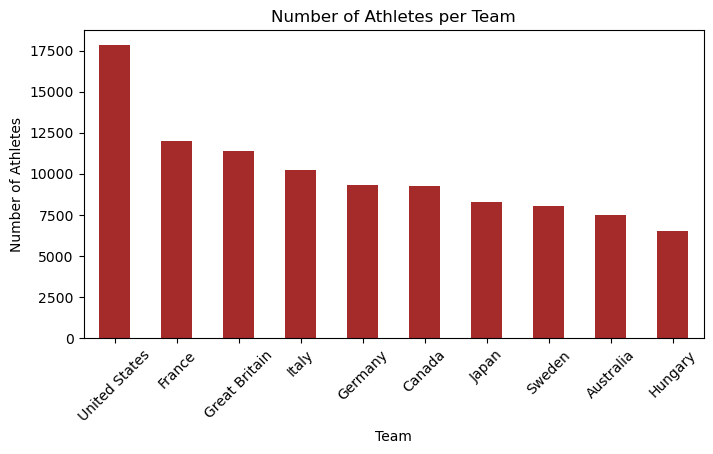

In [44]:
plt.figure(figsize=(8, 4))
abc.plot(kind='bar', color='Brown')
plt.title('Number of Athletes per Team')
plt.xlabel('Team')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45)
plt.show()

#### Filter the dataset to show athletes who won a medal 

In [45]:
medal_wons = df[df['Medal'].isin(['Bronze', 'Silver', 'Gold'])]
medal_wons

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,DEN,Denmark
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,FIN,Finland
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,FIN,Finland
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,FIN,Finland
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,FIN,Finland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,URS,Russia
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,URS,Russia
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze,POL,Poland
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,RUS,Russia


#### Calculate number of medals won by USA in each sport 

In [46]:
medal_wons[(medal_wons['NOC'] == 'USA')].value_counts('Sport')

Sport
Athletics                    1080
Swimming                     1078
Rowing                        375
Basketball                    341
Ice Hockey                    276
Gymnastics                    194
Shooting                      193
Water Polo                    150
Diving                        140
Sailing                       140
Equestrianism                 132
Wrestling                     128
Volleyball                    120
Boxing                        113
Football                      102
Cycling                        78
Bobsleigh                      74
Speed Skating                  70
Fencing                        69
Baseball                       68
Figure Skating                 66
Tennis                         62
Softball                       60
Archery                        57
Alpine Skiing                  44
Weightlifting                  42
Short Track Speed Skating      42
Golf                           38
Rugby                          36
Hockey  

#### Filter the dataset to show athletes who won a medal and participated in the Winter Olympics.

In [47]:
medal_wons[(medal_wons['Season'] == 'Winter')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,FIN,Finland
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,NOR,Norway
61,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze,NOR,Norway
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver,NOR,Norway
64,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze,NOR,Norway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270641,135355,Sergey Mikhaylovich Zubov,M,21.0,186.0,91.0,Unified Team,EUN,1992 Winter,1992,Winter,Albertville,Ice Hockey,Ice Hockey Men's Ice Hockey,Gold,EUN,Russia
270827,135447,Matja Zupan,M,19.0,179.0,60.0,Yugoslavia,YUG,1988 Winter,1988,Winter,Calgary,Ski Jumping,"Ski Jumping Men's Large Hill, Team",Silver,YUG,Serbia
270876,135465,Pirmin Zurbriggen,M,25.0,183.0,83.0,Switzerland,SUI,1988 Winter,1988,Winter,Calgary,Alpine Skiing,Alpine Skiing Men's Downhill,Gold,SUI,Switzerland
270878,135465,Pirmin Zurbriggen,M,25.0,183.0,83.0,Switzerland,SUI,1988 Winter,1988,Winter,Calgary,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze,SUI,Switzerland


#### Top Performers: Top 5 teams with the most gold medals.

In [48]:
gold_medalists = df[df['Medal'] == 'Gold']

gold_medal_counts = gold_medalists['Team'].value_counts()

top_5_teams = gold_medal_counts.nlargest(5)

print(top_5_teams)

United States    2474
Soviet Union     1058
Germany           679
Italy             535
Great Britain     519
Name: Team, dtype: int64


#### Height and Weight Analysis: Create a scatter plot to visualize the relationship between height and weight of athletes.

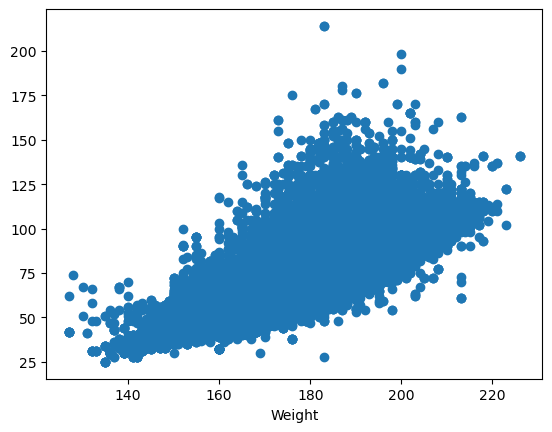

In [49]:
colors = ["Red", "Blue"]
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height')
plt.xlabel('Weight')
plt.show()

## Analyzing the trend of yearly number of Participants using Linear Regression

In [50]:
#Data pre-processing
c1 = df[['Year']].value_counts()
c1.to_csv('yearwise_athlets.csv')
c1

Year
1992    16413
1988    14676
2000    13821
1996    13780
2016    13688
2008    13602
2004    13443
2012    12920
1972    11959
1984    11588
1976    10502
1968    10479
1964     9480
1952     9358
1960     9235
1980     8937
1948     7480
1936     7401
1956     6434
1924     5693
1928     5574
2014     4891
2010     4402
2006     4382
1920     4292
2002     4109
1912     4040
1998     3605
1932     3321
1994     3160
1908     3101
1900     1936
1906     1733
1904     1301
1896      380
dtype: int64

In [51]:
data = pd.read_csv('yearwise_athlets.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    35 non-null     int64
 1   0       35 non-null     int64
dtypes: int64(2)
memory usage: 692.0 bytes


In [52]:
#naming the new columns
data.columns = ["Year", "Participants"]

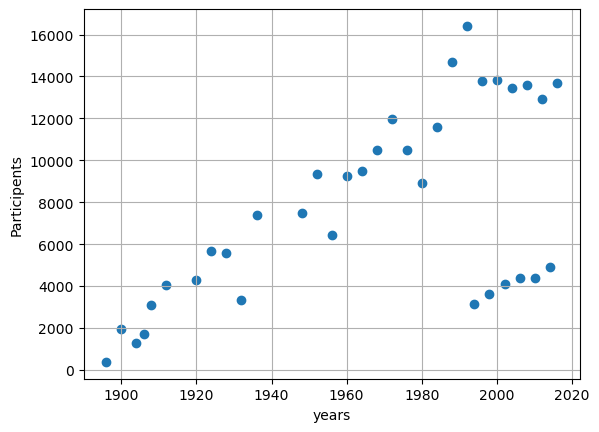

In [53]:
#visualizing the data
plt.scatter(data['Year'], data['Participants'])
plt.xlabel('years')
plt.ylabel('Participents')
plt.grid()

In [54]:
data.sort_values('Year')

,Year,Participants
34,1896,380
31,1900,1936
33,1904,1301
32,1906,1733
30,1908,3101
26,1912,4040
24,1920,4292
19,1924,5693
20,1928,5574
28,1932,3321


In [55]:
#removing outliers manually
data = data.drop(data[(data['Year'] == 1994) | 
(data['Year'] == 1998) | 
(data['Year'] == 2002) | 
(data['Year'] == 2006) | 
(data['Year'] == 2010) | 
(data['Year'] == 2014)].index)
data

,Year,Participants
0,1992,16413
1,1988,14676
2,2000,13821
3,1996,13780
4,2016,13688
5,2008,13602
6,2004,13443
7,2012,12920
8,1972,11959
9,1984,11588


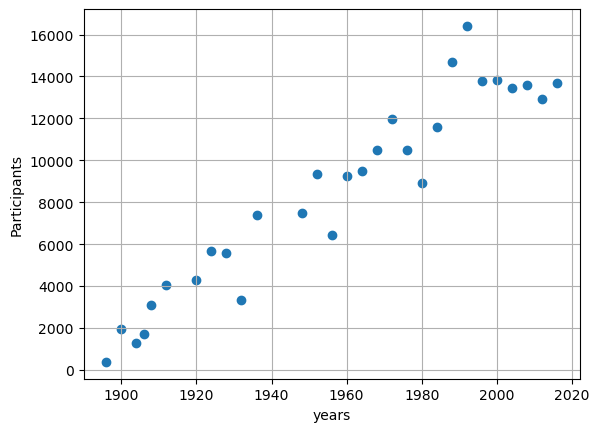

In [56]:
#cross-checking the data after removing ouliers
plt.scatter(data['Year'], data['Participants'])
plt.xlabel('years')
plt.ylabel('Participants')
plt.grid()

In [57]:
#importing libraries required for linear regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

var = linear_model.LinearRegression()

#fitting the data
var.fit(data[['Year']], data['Participants'])

LinearRegression()

In [58]:
#checking the score
var.score(data[['Year']], data['Participants'])

0.9082299688951468

In [59]:
#Enter the year for prediction
var.predict([[2024]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16408.1326127])